# Gráfica dispersión: Edad y Colesterol

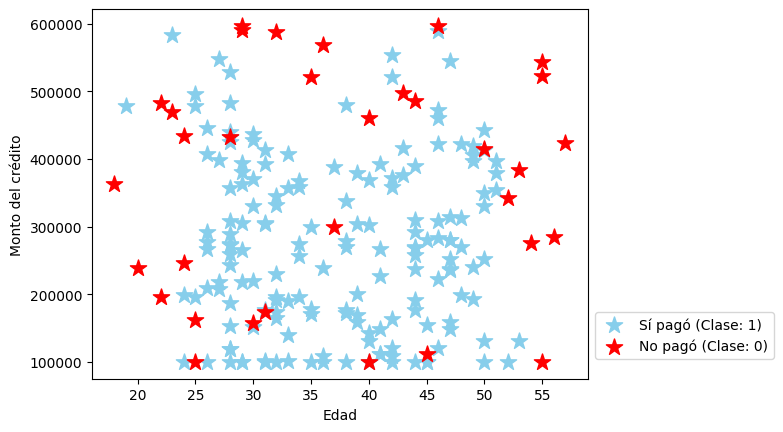

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

clientes = pd.read_csv("creditos.csv")

buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]

plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", 
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()


# Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [6]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
monto = pd.Series([363112, 100200, 100220, 300000])

print(edades.value_counts()/edades.size)
print(monto.value_counts()/monto.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(monto.value_counts()/monto.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
363112    0.25
100200    0.25
100220    0.25
300000    0.25
dtype: float64
2.0
2.0


# Datos de Entrenamiento y Prueba

In [11]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    clientes[["edad", "credito"]], clientes["cumplio"],
    test_size=0.20)


# Creación del Árbol de Decisión

0.875
|--- Edad <= 53.50
|   |--- Edad <= 25.50
|   |   |--- credito <= 455818.50
|   |   |   |--- credito <= 219172.00
|   |   |   |   |--- Edad <= 24.50
|   |   |   |   |   |--- Edad <= 23.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Edad >  23.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Edad >  24.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- credito >  219172.00
|   |   |   |   |--- class: 0
|   |   |--- credito >  455818.50
|   |   |   |--- class: 1
|   |--- Edad >  25.50
|   |   |--- credito <= 484299.00
|   |   |   |--- Edad <= 51.50
|   |   |   |   |--- credito <= 430390.00
|   |   |   |   |   |--- credito <= 175480.50
|   |   |   |   |   |   |--- credito <= 173540.00
|   |   |   |   |   |   |   |--- Edad <= 29.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Edad >  29.50
|   |   |   |   |   |   |   |   |--- Edad <= 30.50
|   |   |   |   |   |   |   |   |   |--- credito <= 154674.50
|   |   |   |  

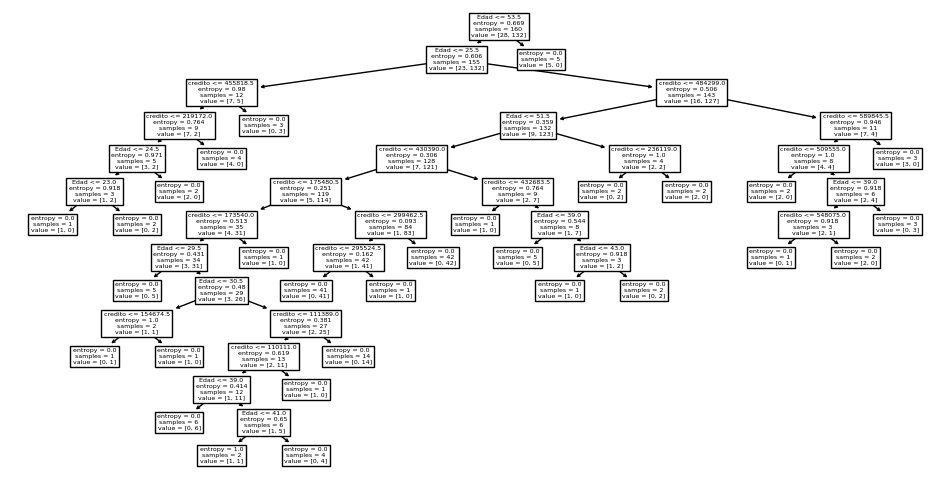

In [13]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "credito"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "credito"])
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Clasifica a nuevos pacientes

In [ ]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [1]


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>